In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


3
58892288/58889256 [==============================] - 2s 0us/step
layers of the model = 
 [<keras.engine.training.Model object at 0x7f270207d668>, <keras.layers.core.Dense object at 0x7f269f62d898>] 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________
None
Found 593 images belonging to 3 classes.
Found 597 images belonging to 3 classes.
Epoch 1/3
19/19 [==============================] - 550s 29s/step - loss: 0.7919 - accuracy: 0.7487 - val_loss: 0.5295 - val_accuracy: 0.9079
Epoch 2/3
19/19 [==============================] - 8s 404ms/step - los

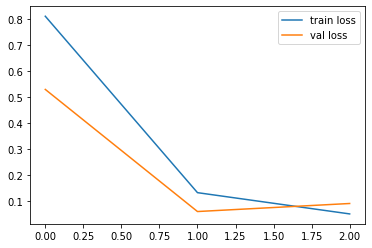

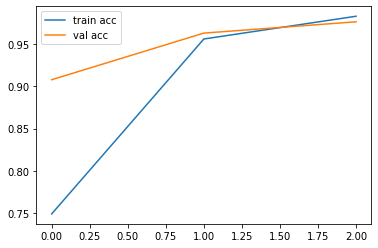

In [0]:
from keras.layers import Dense # , Flatten
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

#creating the classifier
image_resize = 224
batch_size_training = 32
batch_size_validation = 32

# get number of classes
folders = glob('/content/drive/My Drive/TransferLearning_OpenCV/dataset/train/*')
num_classes = len(folders)
print(num_classes)

#building the model
model = Sequential()
model.add(VGG16(
    input_shape=[image_resize,image_resize]+[3],
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))
#model.add(Flatten())
#model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# don't train existing weights
model.layers[0].trainable = False

print("layers of the model = \n",model.layers,"\n")
# print("vgg16 layers = \n",model.layers[0].layers)
# print("output layer = \n",model.layers[1])
print(model.summary())

# compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

#constructing DataGenerator for training and validation set
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rescale = 1./255,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    #horizontal_flip = True
)

# reading the images
train_generator = data_generator.flow_from_directory(
    '/content/drive/My Drive/TransferLearning_OpenCV/dataset/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical'
)

validation_generator = data_generator.flow_from_directory(
    '/content/drive/My Drive/TransferLearning_OpenCV/dataset/valid',
    target_size = (image_resize, image_resize),
    batch_size = batch_size_validation,
    class_mode = 'categorical'
)

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 3

# fitting the model
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

# loss
plt.plot(fit_history.history['loss'], label='train loss')
plt.plot(fit_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(fit_history.history['accuracy'], label='train acc')
plt.plot(fit_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.save('facefeatures_vgg16.h5')
model.save("/content/drive/My Drive/TransferLearning_OpenCV/facefeatures_vgg16.h5")